# Customer Lifetime Value and Boston House Price

- <font size=3>https://reurl.cc/8Gagoy</font>

# 載入程式庫及必要定義

In [1]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '\\Google Drive\\adventures\\'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
# import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'figure/regression\\'
data_dir = groot_dir + 'regression\\'

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
        
def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0  
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]   
    return s

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

def start_plot(figsize=(10, 8), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

EX1DATA = '147xBeCECYur0FxDyly-oG2BqsqEH2Mxm'
EX1DATA2 = '101qw-9OkjCxwuSkBJUBaGURRWpZbFKOe'
EX5DATA = '1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J'
ADVER = '1xFMcCuiMgX9VnelDtbyyV9rXBMFerx8k'
TAIWAN_CSV = '1I5yqulrZSHPSQkxT3oqt_3uVAhPolOEP'
JHU_CSSE = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'
MNIST_TRAIN = '1E-uJ0zqqAfpsVjoOSzqF5TXhDfPNlkQ5'
MNIST_TRAIN_LABEL = '13clNJ2cd2I90W3DEkDBKjZSDNNEqqx3B'
MNIST_TEST = '1zVpVHJl5YABa3qExt1K-O3WaEHXTJekg'
MNIST_TEST_LABEL = '1qci_-dqubnRN-cdrCsbYaUAxyO7_jH9z'

print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage points to ==>', data_dir)

print('\nThis module is amied to leran regression basics...') 
print('\nLibraries and dependenciess imported')
print_now()


Running on win32
Python Version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Data storage points to ==> C:\Users\TyKA\Google Drive\adventures\regression\

This module is amied to leran regression basics...

Libraries and dependenciess imported
2021-07-11 14:25:30.928160


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# 下載資料檔案

In [2]:
fetch_file_via_requests(
    DropboxLink('e7lsf1k6258w7co', 'ec_201012_test_4.csv'), data_dir )

fetch_file_via_requests(
    DropboxLink('fwokyefy0looizp', 'ec_201012_train_4.csv'), data_dir )

'C:\\Users\\TyKA\\Google Drive\\adventures\\regression\\ec_201012_train_4.csv'

In [2]:
import sklearn.metrics
for x in sklearn.metrics.SCORERS.keys():
    print(x)

explained_variance
r2
max_error
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted


# Preparing Data

訓練資料與測試（test）資料的名稱 ec_201012_train_4.csv 和 ec_201012_test_4.csv, 這兩個資料集的欄位相同，包括：

```
'CustomerID', 'date_size', 'date_recency', 'date_time_between',
'date_T', 'baseket_value_sum', 'baseket_value_mean',
'baseket_value_std', 'baseket_value_amax', 'baseket_value_amin',
'baseket_value_median', 'basket_size_sum', 'basket_size_mean',
'basket_size_std', 'basket_size_amax', 'basket_size_amin',
'basket_size_median', 'lag_12', 'lag_11', 'lag_10', 'lag_9', 'lag_8',
'lag_7', 'lag_6', 'lag_5', 'lag_4', 'lag_3', 'lag_2', 'lag_1', 'value'
```

最後一個欄位 <font color='brown'>‘value’</font> 是本案例需要預測的對象，是指未來一定期間內客戶購買的金額，也就是所謂的「貢獻值」。

### 資料命名規則

- CLV Case
    - train: 訓練集載入 DataFrame
    - test: 測試集載入 DataFrame
    - X_train, y_train (clv case 訓練集)
    - X_test, y_test (clv case 測試集)
- load_boston()
    - X_bos, y_bos (load_boston() 資料)
    - bos (資料打包為 Pandas DataFrame)

In [2]:
train_csv = os.path.join(data_dir, 'ec_201012_train_4.csv')
test_csv = os.path.join(data_dir, 'ec_201012_test_4.csv')

In [3]:
train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)

X_train = train.drop(['CustomerID','value'], axis = 1)
y_train = train.value
X_test = test.drop(['CustomerID','value'], axis = 1)
y_test = test.value

## 常常需要載入的 Classes

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Modeling

## Customter Lifetime Value

* 確認遺失值數量

In [6]:
train.isnull().sum(), test.isnull().sum()

(CustomerID              0
 date_size               0
 date_recency            0
 date_time_between       0
 date_T                  0
 baseket_value_sum       0
 baseket_value_mean      0
 baseket_value_std       0
 baseket_value_amax      0
 baseket_value_amin      0
 baseket_value_median    0
 basket_size_sum         0
 basket_size_mean        0
 basket_size_std         0
 basket_size_amax        0
 basket_size_amin        0
 basket_size_median      0
 lag_12                  0
 lag_11                  0
 lag_10                  0
 lag_9                   0
 lag_8                   0
 lag_7                   0
 lag_6                   0
 lag_5                   0
 lag_4                   0
 lag_3                   0
 lag_2                   0
 lag_1                   0
 value                   0
 dtype: int64,
 CustomerID              0
 date_size               0
 date_recency            0
 date_time_between       0
 date_T                  0
 baseket_value_sum       0
 baseket_valu

* 輸出相關係數矩陣 並繪製 heatmap

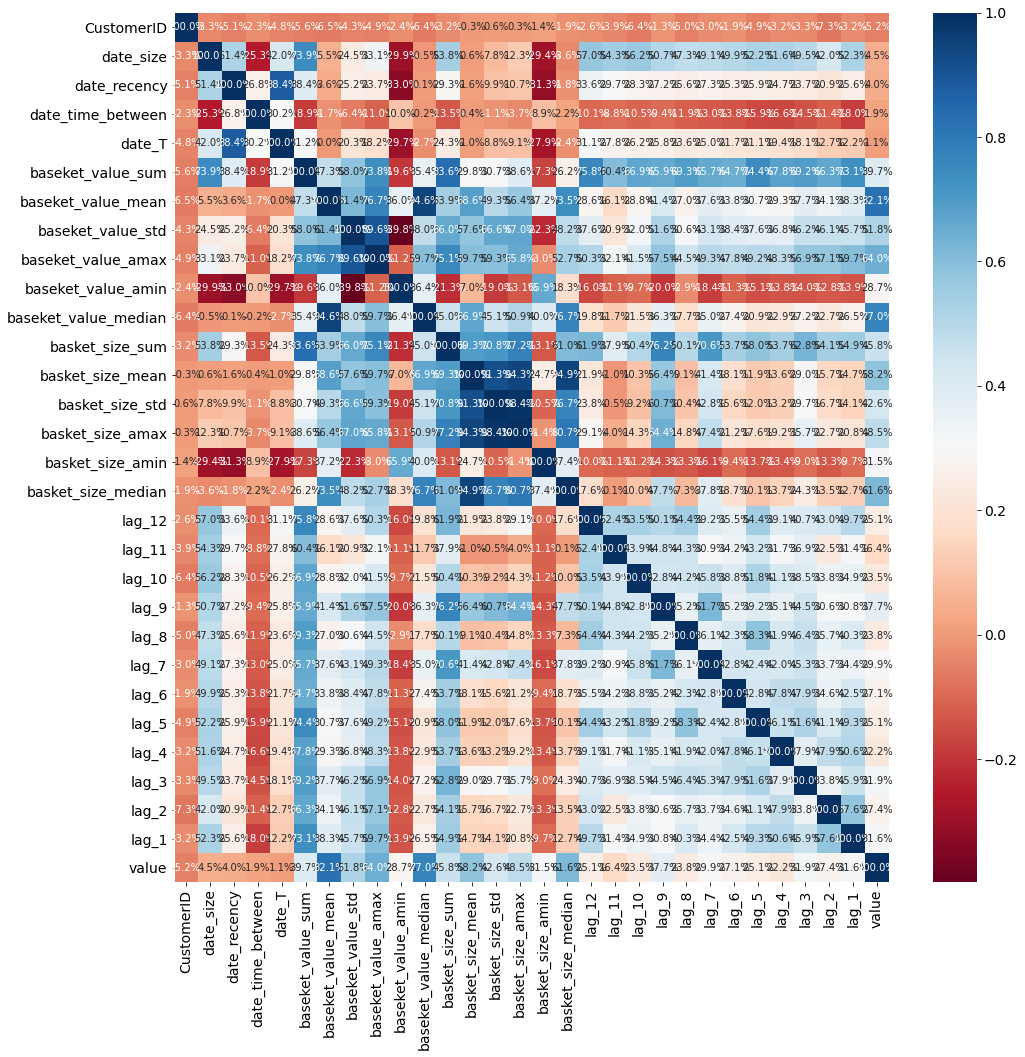

In [6]:
corr = train.corr()

fig, ax = plt.subplots(figsize=(16, 16))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap = "RdBu", annot=True, fmt=".1%")

* 從 corr 取出 value 確認各 feature 相關性( 以 sort_values 排序)

In [7]:
corr["value"].sort_values(ascending=False)

value                   1.000000
baseket_value_mean      0.820950
baseket_value_median    0.769741
baseket_value_amax      0.640401
basket_size_median      0.615922
basket_size_mean        0.581619
baseket_value_std       0.517536
basket_size_amax        0.485117
basket_size_sum         0.458280
basket_size_std         0.425567
baseket_value_sum       0.397159
lag_9                   0.376535
lag_3                   0.318715
lag_1                   0.316485
basket_size_amin        0.315138
lag_7                   0.298841
baseket_value_amin      0.286957
lag_2                   0.273617
lag_6                   0.270893
lag_12                  0.251336
lag_5                   0.251026
lag_8                   0.237849
lag_10                  0.235228
lag_4                   0.222124
lag_11                  0.163937
date_size               0.044787
date_recency            0.040299
date_time_between       0.019402
date_T                  0.011203
CustomerID             -0.052041
Name: valu

* 確認 train 各欄位數據概況 (head)

In [9]:
train.head()

,CustomerID,date_size,date_recency,date_time_between,date_T,baseket_value_sum,baseket_value_mean,baseket_value_std,baseket_value_amax,baseket_value_amin,...,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,value
0,12747,20,352,18,359,4610.02,230.501000,189.437736,715.10,-31.80,...,202.64,190.43,267.37,646.75,0.00,629.68,0.00,1047.75,388.85,1619.826187
1,12748,91,360,4,362,18904.63,207.743187,272.585239,1311.77,-309.73,...,1046.15,241.94,1205.59,700.76,746.50,2643.18,2177.74,2511.67,4232.07,1715.173813
2,12749,6,136,27,148,2460.29,410.048333,594.890110,1198.82,-183.05,...,0.00,0.00,0.00,0.00,764.55,0.00,0.00,1015.77,679.97,1439.007279
3,12820,8,337,48,361,1705.60,213.200000,128.007943,371.56,-41.58,...,0.00,0.00,186.87,0.00,207.33,0.00,0.00,278.00,178.55,1105.152652
4,12823,10,285,31,306,4742.00,474.200000,510.838048,1912.50,190.50,...,508.00,317.50,317.50,381.00,508.00,0.00,381.00,0.00,1912.50,1452.556019


* 載入 StandardScalar, make_pipeline 並搭配 LinearRegression 使用

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

model = make_pipeline(
    StandardScaler(),
    LinearRegression())

train_x = X_train
test_x = X_test
train_y = y_train
test_y = y_test

model.fit(train_x, train_y)
y_pred = model.predict(test_x)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse, r2

(206.1690135064552, 0.6182389801675537)

## load_boston

In [9]:
from sklearn.datasets import load_boston

df = pd.DataFrame(data = load_boston()["data"],
                  columns = load_boston()["feature_names"])
# df["y"] = load_boston()["target"]
y = load_boston()["target"]
# df = df.drop(["y"], axis = 1)

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

* 求出 df 各 feature 的相關係數矩陣(corr)

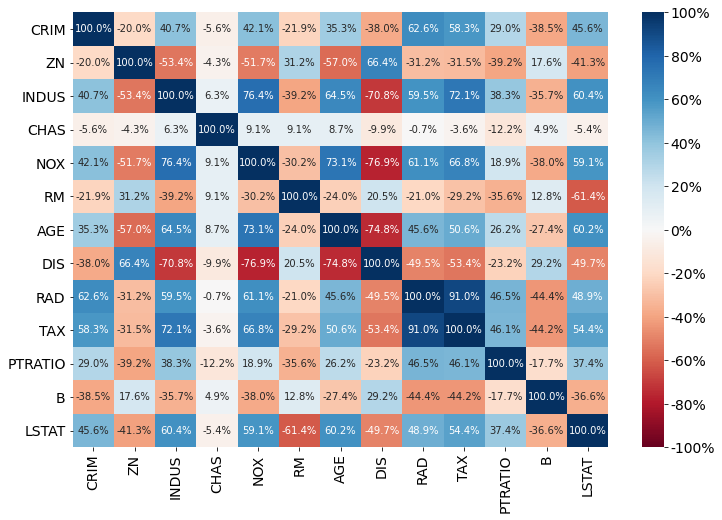

In [10]:
corr = df.corr()

fig, ax = plt.subplots(figsize = (12, 8))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt=".1%", cmap = "RdBu", vmin=-1)
cbar = ax.collections[0].colorbar
cbar.set_ticks([x for x in np.arange(-1, 1.2, 0.2)])
cbar.set_ticklabels([f"{x}%" for x in np.arange(-100, 120, 20)])

* 以 train_test_split 切分數據集，並以 LinearRegression 訓練並輸出 r2_score, rmse

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 0)

# model = make_pipeline(
#     StandardScaler(),
#     LinearRegression())

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse, r2

(5.457311159564055, 0.6354638433202129)

* 從 statsmodels.tool.eval_measures 載入 rmse 並求出 rmse

In [12]:
from statsmodels.tools.eval_measures import rmse

model = simple_ols(df, y)
rmse_score = rmse(y, model.fittedvalues)
rmse_score

4.679191295697281

# Charting

* 輸出 start_plot 繪圖副程式

In [13]:
def start_plot(figsize = (12, 8), style = "whitegrid"):
    fig = plt.figure(figsize = figsize)
    gs = fig.add_gridspec(1, 1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0, 0])
    return ax

## 誤差值的統計分佈模型 Distribution of Residuals

- Points are **independent** of each other (residuals are uncorrelated)
- <font color='brown'>**residual ε are normally distributed with  μ = 0**</font>

* 比較 boston 全數據集 與 測試數據集兩者與預測值(y_pred)差異

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


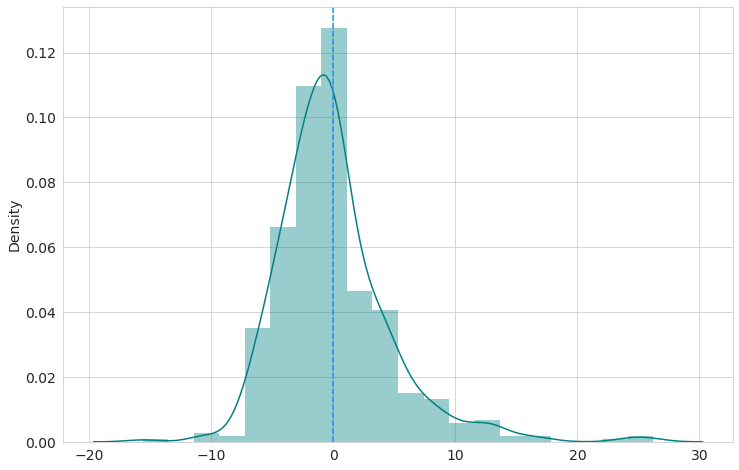

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(df, y)
y_pred = model.predict(df)

ax = start_plot()
ax = sns.distplot(y - y_pred, bins = 20, color="teal")
ax.axvline(x = 0, ls = "--", c = "dodgerblue")

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


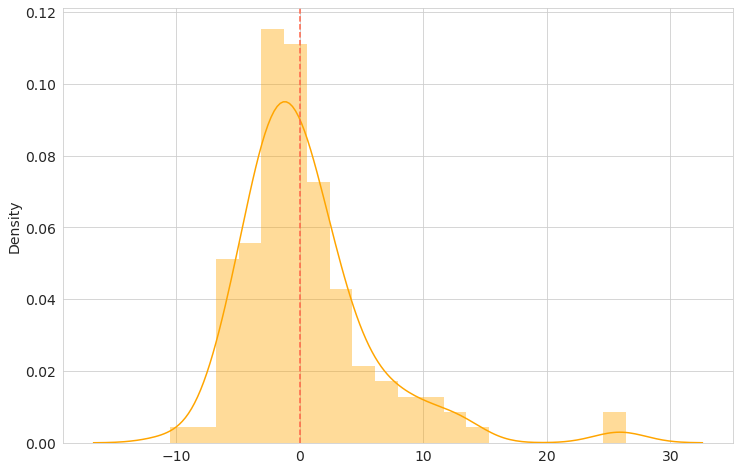

In [15]:
# model = make_pipeline(
#     StandardScaler(),
#     LinearRegression()
# )

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

ax = start_plot()
ax = sns.distplot(y_test - y_pred, bins = 20, color = "orange")
ax.axvline(x = 0, ls= "--", color = "tomato")

* 試算出殘差(Residuals) \
Note: 殘差(Residuals = y_ture - y_pred)

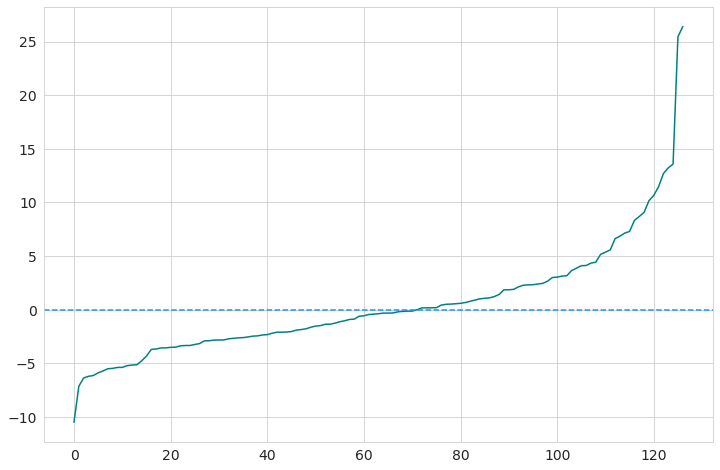

In [24]:
residuals = pd.Series(y_test - y_pred).sort_values(ascending = True)

ax = start_plot()
ax.plot(range(len(residuals)), residuals, c = "teal")
ax.axhline(y = 0, ls = "--", color = "dodgerblue")

## 預測值的範圍與分佈

* 試繪出 y_test 及 y_pred 

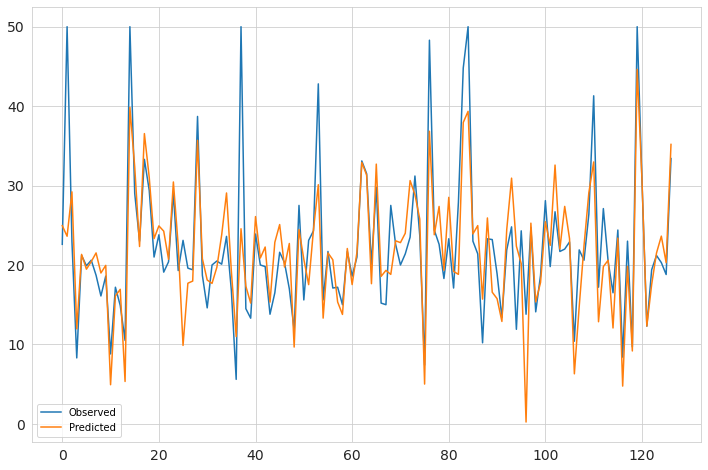

In [25]:
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

ax = start_plot()
ax.plot(range(len(y_test)), y_test, label = "Observed")
ax.plot(range(len(y_pred)), y_pred, label = "Predicted")
ax.legend()


* 建立新的 DataFrame(ndf) 收納 y_test, y_pred

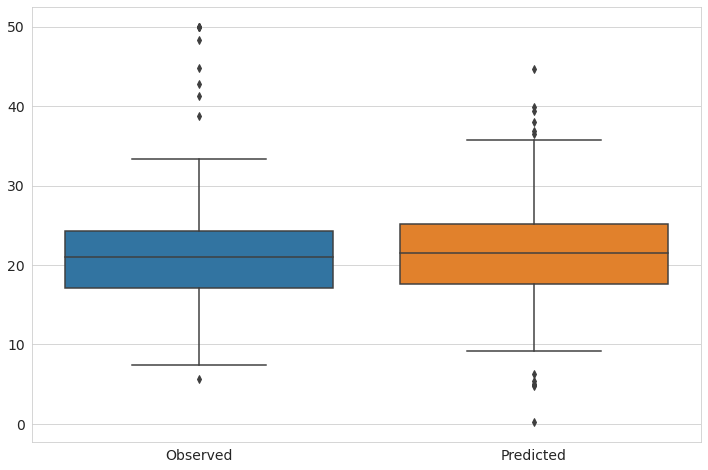

In [26]:
ndf = pd.DataFrame()
ndf["Observed"] = y_test
ndf["Predicted"] = y_pred

ax = start_plot()
ax = sns.boxplot(data = ndf, orient="v")

* 將 ndf 數據繪製 seaborn.distplot

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


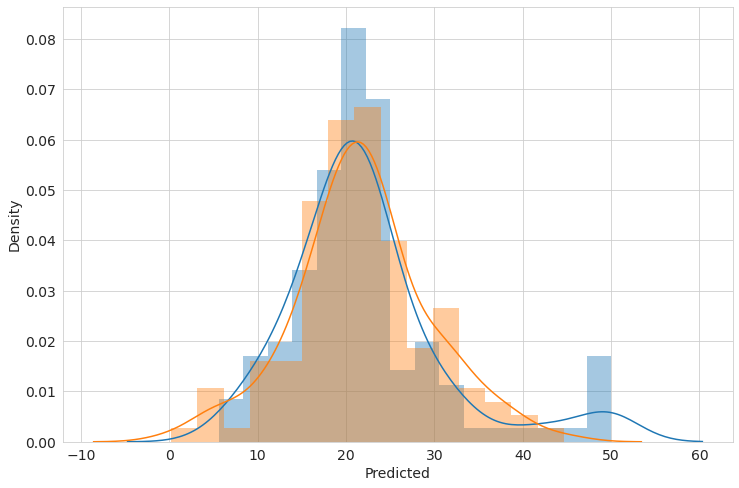

In [27]:
ax = start_plot()
ax = sns.distplot(ndf["Observed"])
ax = sns.distplot(ndf["Predicted"])

## $ y  - \hat y$ (預測效果) 的分析 （Regression Prediction Error）

- [YellowBrick PredictionErrorPlot](https://www.scikit-yb.org/en/latest/api/regressor/peplot.html)

![texto alternativo](https://www.scikit-yb.org/en/latest/api/regressor/peplot-1.png)

conda install yellowbrick

* 載入 LinearRegression model 並輸出 y_pred
* 輸出 seaborn.regplot(), scatter

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


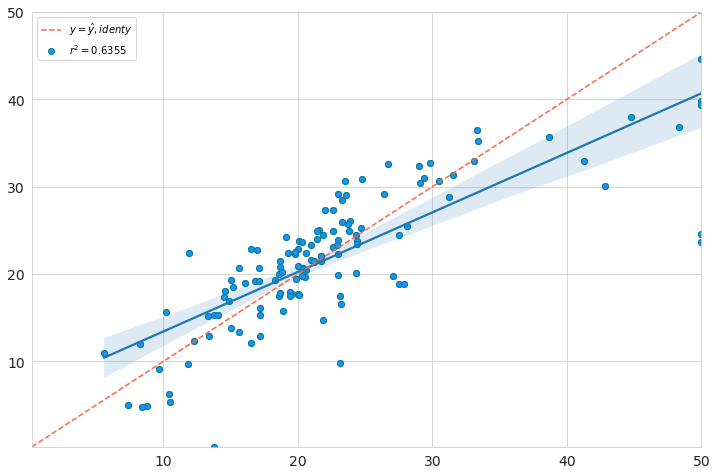

In [28]:
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

ax = start_plot()
ax = sns.regplot(y_test, y_pred)
ax.scatter(y_test, y_pred, c = "dodgerblue", edgecolor = "teal", label = r"$r^2 = %.4f$" %r2_score(y_test, y_pred))

# 確保圖形 X, Y 軸長對稱
lim1 = min(min(y_test), min(y_pred))
lim2 = max(max(y_test), max(y_pred))
lim = [lim1, lim2]
ax.set_ylim(lim)
ax.set_xlim(lim)
ax.plot(lim, lim, c = "tomato", ls = "--", label = r"$y = \hat y, identy$")
ax.legend()

## Residuals Analysis 錯誤值的分析

- [Residuals Plot](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html)

* 載入 LinearRegression 並取 x_train, y_train 訓練，輸出residual_train, residual_test

In [29]:
model = LinearRegression().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

* 輸出 真實值 與 預測值 及 $r^{2}$

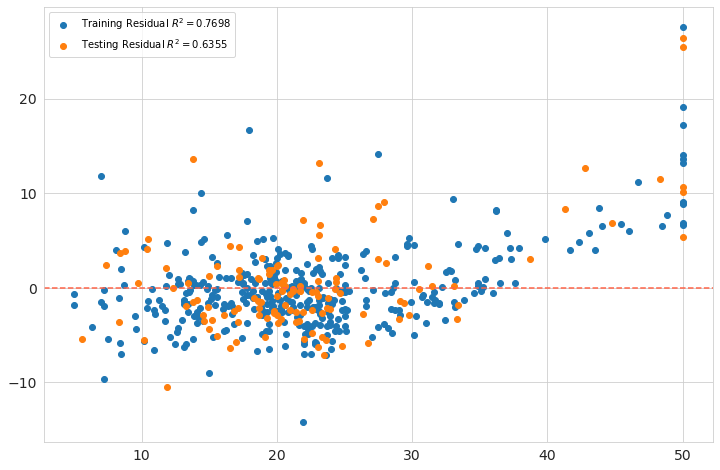

In [30]:
ax = start_plot()
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
ax.scatter(y_train, residual_train, label ="Training Residual " + r"$R^2 = %.4f$" %r2_train)
ax.scatter(y_test, residual_test, label = "Testing Residual " + r"$R^2 = %.4f$" %r2_test)
ax.axhline(y = 0, ls = "--", color = "tomato")
ax.legend(fancybox = True)

### My Residuals Plot

## 學習曲線

* 繪製 Learning curve 

In [31]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, x, y, cv = None, scoring = None, n_jobs = None, train_sizes = np.linspace(0.1, 1.0, 10)):
    fig, ax = plt.subplots(figsize =(12, 8))
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, x, y, cv=cv, scoring=scoring, 
                                                                          n_jobs=n_jobs, train_sizes=train_sizes,
                                                                          return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis = 1)
    fit_times_mean = np.mean(fit_times, axis = 1)
    fit_times_std = np.std(fit_times, axis = 1)
    
    # Ploting curves
    ax.plot(train_sizes, train_scores_mean, "o-", color = "dodgerblue", label = "Training Score")
    ax.plot(train_sizes, test_scores_mean, "o-", color = "tomato", label = "Cross-Validation Score")
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean+train_scores_std, alpha = 0.1, 
                    color = "teal")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1,
                    color = "orange")
    ax.grid()
    ax.legend()

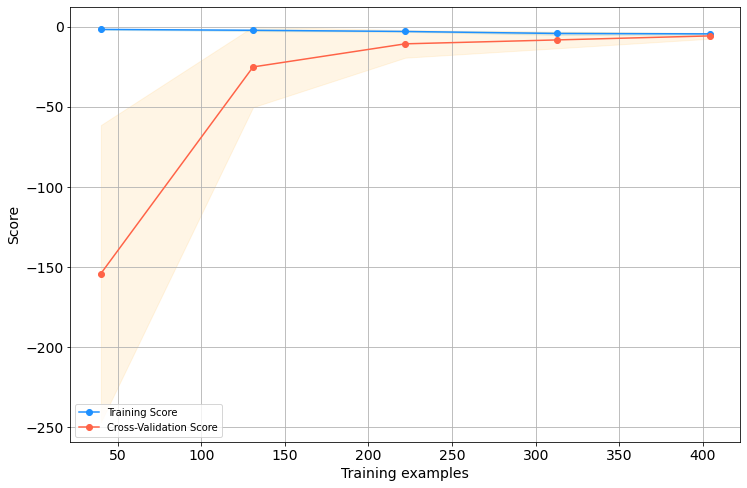

In [32]:
plot_learning_curves(LinearRegression(), df, y, train_sizes=np.linspace(0.1, 1, 5), scoring = "neg_root_mean_squared_error")

# Metrics & Outliers

## Cook's Distance

- [Wikipedia](https://en.wikipedia.org/wiki/Cook%27s_distance)
- [Mathworks](https://www.mathworks.com/help/stats/cooks-distance.html#:~:text=Cook's%20distance%20is%20the%20scaled,on%20the%20fitted%20response%20values.)
- [Stackoverflow QA](https://stackoverflow.com/questions/51390196/how-to-calculate-cooks-distance-dffits-using-python-statsmodel)

- [MAPE formula](https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069)

- [Issue 15007](https://github.com/scikit-learn/scikit-learn/pull/15007)

>Simply said, Cook’s D is calculated by removing the ith data point from the model and recalculating the regression. All the values in the regression model are then observed whether changes have been detected after the removal of the point. This is an iterative way of examining the influence of that observation.



以 loas_boston 為例：

```
model = simple_ols(X_bos, y_bos)
infl = model.get_influence()
rdf = infl.summary_frame()
cooks_d = rdf['cooks_d']
```

### Cook Distance 用以評估單一點對於整個回歸模型的影響程度

* 嘗試從 yellowbrick.regressor 載入 CooksDistance 並繪製結果
* Cooks's Distance 若為平均值的3倍，則判定為 Outlier

In [33]:
from yellowbrick.regressor import CooksDistance

model = simple_ols(df, y)
infl = model.get_influence()
rdf = infl.summary_frame()

<BarContainer object of 506 artists>

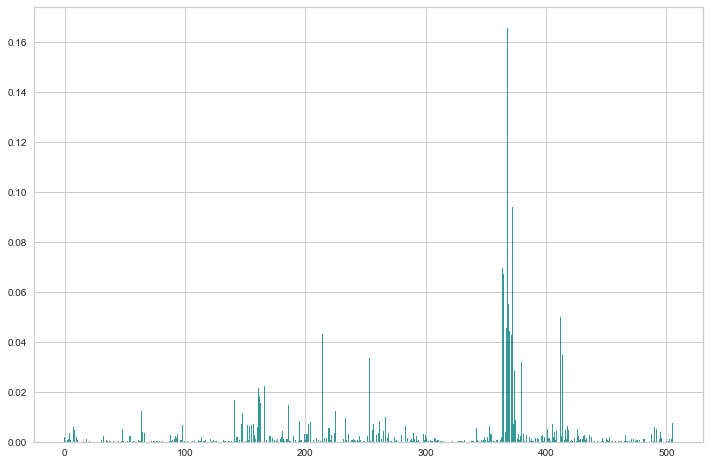

In [34]:
cooks_d = rdf["cooks_d"]
ax = start_plot()
ax.bar(range(len(cooks_d)), cooks_d, color = "teal", alpha = 0.8)

* 顯示並排序 cooks's distance

In [73]:
cooks_d = rdf["cooks_d"].sort_values(ascending = False)
type(cooks_d), cooks_d

(pandas.core.series.Series,
 368    1.656737e-01
 372    9.409651e-02
 364    6.942966e-02
 365    6.718425e-02
 369    5.526255e-02
            ...     
 9      4.013832e-08
 456    2.098935e-08
 68     1.977438e-08
 226    1.446598e-08
 286    3.038789e-10
 Name: cooks_d, Length: 506, dtype: float64)

* 取出前8%的 cooks's distance

In [35]:
top8 = cooks_d.index[:int(len(cooks_d)*0.08)]
top8

RangeIndex(start=0, stop=40, step=1)

* 找出 3 倍 cooks's distance 平均值的 index

In [36]:
u3 = 3* cooks_d.mean()
above3 = list(cooks_d.loc[cooks_d > u3].index)
above3

[64,
 141,
 148,
 161,
 162,
 163,
 166,
 186,
 214,
 225,
 228,
 233,
 253,
 267,
 364,
 365,
 367,
 368,
 369,
 370,
 371,
 372,
 374,
 380,
 412,
 414]

* 將 boston 數據集 df 移除 大於3倍平均值的數量 \
Note: drop 的 axis 必須為0，因為這部分移除 index


In [37]:
df2 = df.drop(above3, axis = 0)

* 確認移除後有無改善

In [38]:
ys = pd.Series(y)
ys

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), df, y)
scores2 = cross_val_score(LinearRegression(), df2, ys.drop(above3, axis = 0))

print(scores)
print(scores.mean(), scores.std())
print("-"*80)
print(scores2)
print(scores2.mean(), scores2.std())

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.3532759243958772 0.37656783933262267
--------------------------------------------------------------------------------
[0.7086201  0.82324401 0.74454528 0.55247982 0.34892936]
0.6355637111220659 0.16822621606723065


- [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- [What Is R Squared And Negative R Squared](http://www.fairlynerdy.com/what-is-r-squared/)
- [Can the multiple linear correlation coefficient be negative?](https://stats.stackexchange.com/questions/6181/can-the-multiple-linear-correlation-coefficient-be-negative)

### yellowbrick 版本

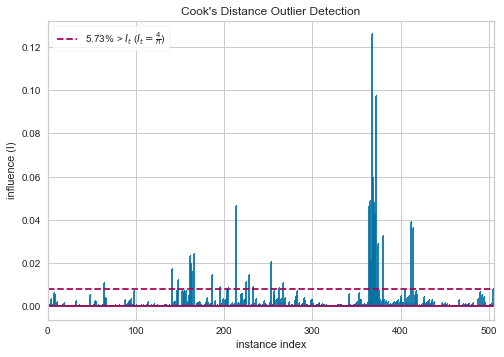

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [40]:

from yellowbrick.regressor import CooksDistance
from sklearn.datasets import load_boston

data = load_boston()
X, y = data['data'], data['target']

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()


## VIF

>Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.

- [select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)
- [endog, exog, what’s that?](https://www.statsmodels.org/stable/endog_exog.html)

* VIF用以檢驗不同欄位間多元貢獻性的多寡
- 使用以下副程式反覆將各 "數值欄位" 的VIF值找出來

In [41]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston

def vif_scores(df):
    df.dropna()
    df = df.select_dtypes(include = [np.number])
    vif = pd.DataFrame()
    
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    return vif

def my_mape(estimator, x, y):
    estimator.fit(x, y)
    y_pred = estimator.predict(x)
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y))*100

In [42]:
df2 = df.copy()
vif = vif_scores(df2)
vif

,VIF Factor,features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


In [43]:
vindex = list(vif["VIF Factor"].sort_values(ascending=False).index)

In [44]:
vindex

[10, 5, 4, 9, 6, 11, 8, 7, 2, 12, 1, 0, 3]

In [45]:
vif.iloc[vindex[:3]]["features"]

10    PTRATIO
5          RM
4         NOX
Name: features, dtype: object

In [46]:
df2 = df2.drop(vif.iloc[vindex[:3]]["features"], axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    float64
 4   AGE     506 non-null    float64
 5   DIS     506 non-null    float64
 6   RAD     506 non-null    float64
 7   TAX     506 non-null    float64
 8   B       506 non-null    float64
 9   LSTAT   506 non-null    float64
dtypes: float64(10)
memory usage: 39.7 KB


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), df, y)
scores = cross_val_score(LinearRegression(), df2, y)

print(scores)
print(scores.mean(), scores.std())
print("\n")
print(scores2)
print(scores2.mean(), scores2.std())

[0.37380341 0.57986667 0.38025632 0.54894859 0.19426611]
0.4154282179101513 0.1391043206034072


[0.7086201  0.82324401 0.74454528 0.55247982 0.34892936]
0.6355637111220659 0.16822621606723065


# 降維

## Principal Component Analysis


- [線代啟示錄：主成分分析](https://ccjou.wordpress.com/2013/04/15/主成分分析/)
- [機器/統計學習:主成分分析(Principal Component Analysis, PCA)](https://medium.com/@chih.sheng.huang821/機器-統計學習-主成分分析-principle-component-analysis-pca-58229cd26e71)
- [主成分分析的原理](http://web.ntpu.edu.tw/~ccw/statmath/M_pca.pdf)
- [如何通俗易懂地讲解什么是 PCA 主成分分析？](https://www.zhihu.com/question/41120789)
- [scikit-learn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [scikit-learn User Guide: 2.5. Decomposing signals in components (matrix factorization problems)](https://scikit-learn.org/stable/modules/decomposition.html#pca)

- [Principal Component Analysis (PCA) in Python](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python)
- [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# rmse
training_rmse = -np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = -np.sqrt(mean_squared_error(y_test, y_pred_test))

# score → return r^2
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)

print("Training: Score = %.4f, neg rmse = %.4f" %(training_score, training_rmse))
print("Testing: Score = %.4f, neg rmse = %.4f" %(testing_score, test_rmse))

Training: Score = 0.7698, neg rmse = -4.4318
Testing: Score = 0.6355, neg rmse = -5.4573


In [51]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [53]:
np.arange(13, 2, -1)

array([13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3])

In [54]:
np.arange(3, 13+1, 1)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [55]:
# N = 原始 成分數
N = len(x_train.columns)

scores_train = np.zeros(N)
scores_test = np.zeros(N)

for i in np.arange(N, 2, -1):
    model = make_pipeline(StandardScaler(),
                          PCA(n_components=i),
                          LinearRegression())
    model.fit(x_train, y_train)
    scores_train[i-1] = model.score(x_train,  y_train)
    scores_test[i-1] = model.score(x_test, y_test)

In [56]:
scores_train

array([0.        , 0.        , 0.69963776, 0.70048575, 0.73745229,
       0.73778637, 0.73844573, 0.74259124, 0.74268734, 0.74378519,
       0.75461945, 0.76342876, 0.76976995])

In [57]:
scores_test

array([0.        , 0.        , 0.48521466, 0.48085836, 0.56410166,
       0.56429517, 0.56333915, 0.5679499 , 0.56802395, 0.57287806,
       0.5885127 , 0.61715117, 0.63546384])

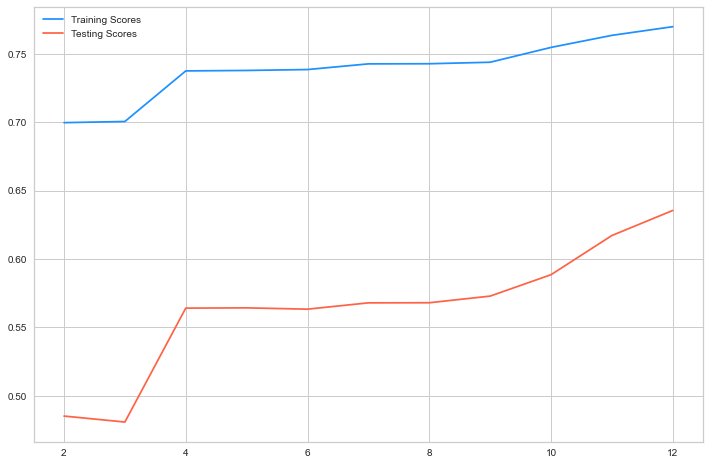

In [58]:
x_domain = np.arange(2, N, 1)
ax = start_plot()
ax.plot(x_domain, scores_train[2:], color = "dodgerblue", label = "Training Scores")
ax.plot(x_domain, scores_test[2:], color = "tomato", label = "Testing Scores")
ax.legend()

### Git it a try

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline

def PCA_analysis(estimater, n_features, X_train, y_train, 
    X_test = None, y_test = None):

    N = n_features

    scores_train = np.zeros(N)
    scores_test = np.zeros(N)

    for i in np.arange(N, 2, -1):
        model = make_pipeline(
            PCA(n_components = i),
            estimater
        )
        model.fit(X_train, y_train)
        scores_train[i-1] = model.score(X_train, y_train)
        if X_test is not None:
            scores_test[i-1] = model.score(X_test, y_test)

    xdomain = np.arange(2, N, 1)
    ax = start_plot(figsize=(10,7))
    ax.plot(xdomain, scores_train[2:], label = 'Training Scores')
    if X_test is not None:
        ax.plot(xdomain, scores_test[2:], color = 'brown',
            label = 'Test Scores')
    ax.legend(loc='lower center', frameon=True,shadow=True,fancybox=True,fontsize=14)


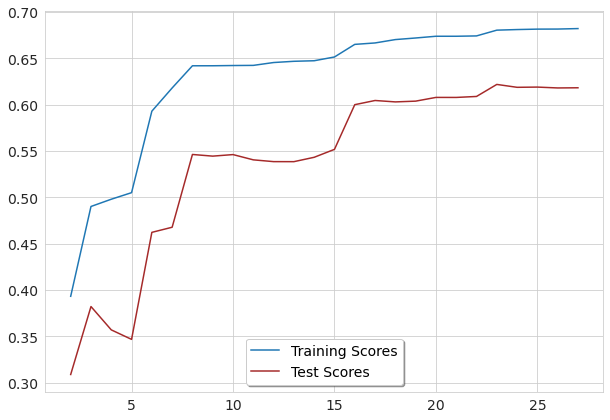

In [19]:
from sklearn.preprocessing import MinMaxScaler

model = make_pipeline(
    MinMaxScaler(),
    LinearRegression(),
)

PCA_analysis(model, X_train.shape[1], X_train, y_train, X_test, y_test)